# Desafio 1 - Maratona Behind the Code 2021

### Caio Arantes


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [48]:
# Carregue aqui o dataset
df1 = pd.read_csv("../data/LOANS.csv")
df2 = pd.read_csv("../data/ACCOUNTS.csv")
df3 = pd.read_csv("../data/DEMOGRAPHICS.csv")
df1.head()

,ID,PAYMENT_TERM,INSTALLMENT_PLANS,INSTALLMENT_PERCENT,LOAN_PURPOSE,LOAN_AMOUNT,OTHERS_ON_LOAN,ALLOW
0,610339,713.0,STORES,3.0,CAR_USED,3103.0,NONE,1
1,109167,341.0,STORES,1.0,CAR_NEW,716.0,NONE,1
2,823322,868.0,NONE,4.0,APPLIANCES,4333.0,NONE,1
3,322224,310.0,STORES,2.0,FURNITURE,250.0,NONE,1
4,912693,620.0,NONE,2.0,CAR_USED,2454.0,NONE,0


In [49]:
df2.head()

,ID,CHECKING_BALANCE,CREDIT_HISTORY,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT
0,291655,-566.53,ALL_CREDITS_PAID_BACK,36.42,1.0
1,657079,-1673.16,CREDITS_PAID_TO_DATE,22.9,1.0
2,256050,NO_CHECKING,CREDITS_PAID_TO_DATE,450.35,2.0
3,1039151,-1471.03,PRIOR_PAYMENTS_DELAYED,805.71,2.0
4,1002660,NO_CHECKING,CREDITS_PAID_TO_DATE,295.03,1.0


In [50]:
df3.head()

,ID,SEX,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,EMPLOYMENT_DURATION,PROPERTY,HOUSING,CURRENT_RESIDENCE_DURATION
0,24252,M,47.0,3.0,1.0,0.0,1.0,14.0,SAVINGS_INSURANCE,OWN,3.0
1,1002018,M,19.0,3.0,1.0,0.0,1.0,0.0,SAVINGS_INSURANCE,RENT,2.0
2,1240455,F,50.0,2.0,1.0,1.0,1.0,7.0,UNKNOWN,OWN,3.0
3,107799,M,35.0,3.0,1.0,0.0,1.0,0.0,REAL_ESTATE,OWN,2.0
4,184883,M,40.0,1.0,1.0,0.0,1.0,9.0,CAR_OTHER,OWN,4.0


Renomeie o nome da variável criada com o dataset para `loans`, para ficar de acordo com os códigos abaixo.

In [51]:
df = df1.merge(df2, on='ID', how='left')
df = df.merge(df3, on='ID', how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 0 to 3998
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          3999 non-null   int64  
 1   PAYMENT_TERM                3975 non-null   float64
 2   INSTALLMENT_PLANS           3978 non-null   object 
 3   INSTALLMENT_PERCENT         3974 non-null   float64
 4   LOAN_PURPOSE                3979 non-null   object 
 5   LOAN_AMOUNT                 3981 non-null   float64
 6   OTHERS_ON_LOAN              3977 non-null   object 
 7   ALLOW                       3999 non-null   int64  
 8   CHECKING_BALANCE            2467 non-null   object 
 9   CREDIT_HISTORY              2462 non-null   object 
 10  EXISTING_SAVINGS            2467 non-null   object 
 11  EXISTING_CREDITS_COUNT      2463 non-null   float64
 12  SEX                         3920 non-null   object 
 13  AGE                         3918 

In [52]:
df.describe()

,ID,PAYMENT_TERM,INSTALLMENT_PERCENT,LOAN_AMOUNT,ALLOW,EXISTING_CREDITS_COUNT,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,EMPLOYMENT_DURATION,CURRENT_RESIDENCE_DURATION
count,3.999000e+03,3975.000000,3974.000000,3981.000000,3999.000000,2463.000000,3918.000000,3910.000000,3915.000000,3915.000000,3909.000000,3923.000000,3917.000000
mean,6.603562e+05,653.796981,2.981379,3479.168802,0.664166,1.469752,36.032925,2.429923,1.161175,0.412005,0.975697,4.238848,2.865458
std,3.728332e+05,338.723239,1.121448,2489.961917,0.472340,0.569142,10.617743,0.931842,0.367739,0.492259,0.154008,3.595680,1.115873
min,9.800000e+01,120.000000,1.000000,250.000000,0.000000,1.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,3.418460e+05,390.000000,2.000000,1330.000000,0.000000,1.000000,28.000000,2.000000,1.000000,0.000000,1.000000,1.000000,2.000000
50%,6.670610e+05,651.000000,3.000000,3237.000000,1.000000,1.000000,36.000000,3.000000,1.000000,0.000000,1.000000,4.000000,3.000000
75%,9.778745e+05,899.000000,4.000000,5334.000000,1.000000,2.000000,44.000000,3.000000,1.000000,1.000000,1.000000,7.000000,4.000000
max,1.320082e+06,1984.000000,6.000000,11676.000000,1.000000,3.000000,74.000000,3.000000,2.000000,1.000000,1.000000,18.000000,6.000000


A variável destino para este desafio é a `ALLOW`, significando se um empréstimo deverá ser permitido ou não, baseado nas informações dadas. Vamos dar uma olhada em como está a distribuição dessa variável

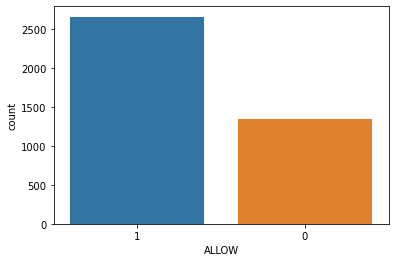

In [53]:
risk_plot = sns.countplot(data=df, x='ALLOW', order=df['ALLOW'].value_counts().index)
plt.show()

In [54]:
df.drop('ID', axis=1, inplace = True)

In [55]:
pd.get_dummies(df)

,PAYMENT_TERM,INSTALLMENT_PERCENT,LOAN_AMOUNT,ALLOW,EXISTING_CREDITS_COUNT,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,...,EXISTING_SAVINGS_UNKNOWN,SEX_F,SEX_M,PROPERTY_CAR_OTHER,PROPERTY_REAL_ESTATE,PROPERTY_SAVINGS_INSURANCE,PROPERTY_UNKNOWN,HOUSING_FREE,HOUSING_OWN,HOUSING_RENT
0,713.0,3.0,3103.0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,341.0,1.0,716.0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,868.0,4.0,4333.0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,310.0,2.0,250.0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,620.0,2.0,2454.0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,450.0,3.0,3007.0,0,1.0,41.0,0.0,1.0,0.0,1.0,...,0,1,0,1,0,0,0,0,1,0
3995,510.0,4.0,4191.0,1,1.0,46.0,3.0,1.0,1.0,1.0,...,0,0,1,0,0,1,0,0,1,0
3996,124.0,1.0,250.0,1,2.0,28.0,3.0,1.0,1.0,1.0,...,0,0,1,1,0,0,0,0,0,1
3997,961.0,3.0,5172.0,1,1.0,46.0,0.0,1.0,0.0,1.0,...,1,0,1,1,0,0,0,0,0,1


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 0 to 3998
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PAYMENT_TERM                3975 non-null   float64
 1   INSTALLMENT_PLANS           3978 non-null   object 
 2   INSTALLMENT_PERCENT         3974 non-null   float64
 3   LOAN_PURPOSE                3979 non-null   object 
 4   LOAN_AMOUNT                 3981 non-null   float64
 5   OTHERS_ON_LOAN              3977 non-null   object 
 6   ALLOW                       3999 non-null   int64  
 7   CHECKING_BALANCE            2467 non-null   object 
 8   CREDIT_HISTORY              2462 non-null   object 
 9   EXISTING_SAVINGS            2467 non-null   object 
 10  EXISTING_CREDITS_COUNT      2463 non-null   float64
 11  SEX                         3920 non-null   object 
 12  AGE                         3918 non-null   float64
 13  JOB_TYPE                    3910 

In [57]:
df[['INSTALLMENT_PLANS']].value_counts()

INSTALLMENT_PLANS
NONE                 2782
STORES                815
BANK                  381
dtype: int64

In [58]:
df[['LOAN_PURPOSE']].value_counts()

LOAN_PURPOSE
CAR_NEW         748
FURNITURE       690
CAR_USED        652
RADIO_TV        604
APPLIANCES      436
REPAIRS         229
VACATION        163
RETRAINING      130
EDUCATION       126
BUSINESS        114
OTHER            87
dtype: int64

In [59]:
df[['OTHERS_ON_LOAN']].value_counts()

OTHERS_ON_LOAN
NONE              3306
CO-APPLICANT       576
GUARANTOR           95
dtype: int64

In [60]:
df[['CHECKING_BALANCE']].value_counts()

CHECKING_BALANCE
NO_CHECKING         988
0                    71
42.83                 3
97.41                 3
19.0                  2
                   ... 
-49.52                1
-49.25                1
-488.94               1
-485.37               1
103.08                1
Length: 1396, dtype: int64

In [61]:
df['CHECKING_BALANCE'] = df['CHECKING_BALANCE'].replace(to_replace ="NO_CHECKING",value ="0")
df['CHECKING_BALANCE'] = pd.to_numeric(df['CHECKING_BALANCE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 0 to 3998
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PAYMENT_TERM                3975 non-null   float64
 1   INSTALLMENT_PLANS           3978 non-null   object 
 2   INSTALLMENT_PERCENT         3974 non-null   float64
 3   LOAN_PURPOSE                3979 non-null   object 
 4   LOAN_AMOUNT                 3981 non-null   float64
 5   OTHERS_ON_LOAN              3977 non-null   object 
 6   ALLOW                       3999 non-null   int64  
 7   CHECKING_BALANCE            2467 non-null   float64
 8   CREDIT_HISTORY              2462 non-null   object 
 9   EXISTING_SAVINGS            2467 non-null   object 
 10  EXISTING_CREDITS_COUNT      2463 non-null   float64
 11  SEX                         3920 non-null   object 
 12  AGE                         3918 non-null   float64
 13  JOB_TYPE                    3910 

In [62]:
df[['CREDIT_HISTORY']].value_counts()

CREDIT_HISTORY        
PRIOR_PAYMENTS_DELAYED    848
CREDITS_PAID_TO_DATE      725
OUTSTANDING_CREDIT        453
ALL_CREDITS_PAID_BACK     375
NO_CREDITS                 61
dtype: int64

In [63]:
df[['EXISTING_SAVINGS']].value_counts()

EXISTING_SAVINGS
UNKNOWN             176
100.89                3
28.92                 3
48.08                 2
88.84                 2
                   ... 
309.5                 1
3088.72               1
30675.5               1
306.08                1
453.59                1
Length: 2238, dtype: int64

In [64]:
df['EXISTING_SAVINGS'] = df['EXISTING_SAVINGS'].replace(to_replace ="UNKNOWN",value ="0")
df['EXISTING_SAVINGS'] = pd.to_numeric(df['EXISTING_SAVINGS'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 0 to 3998
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PAYMENT_TERM                3975 non-null   float64
 1   INSTALLMENT_PLANS           3978 non-null   object 
 2   INSTALLMENT_PERCENT         3974 non-null   float64
 3   LOAN_PURPOSE                3979 non-null   object 
 4   LOAN_AMOUNT                 3981 non-null   float64
 5   OTHERS_ON_LOAN              3977 non-null   object 
 6   ALLOW                       3999 non-null   int64  
 7   CHECKING_BALANCE            2467 non-null   float64
 8   CREDIT_HISTORY              2462 non-null   object 
 9   EXISTING_SAVINGS            2467 non-null   float64
 10  EXISTING_CREDITS_COUNT      2463 non-null   float64
 11  SEX                         3920 non-null   object 
 12  AGE                         3918 non-null   float64
 13  JOB_TYPE                    3910 

In [65]:
df[['SEX']].value_counts()

SEX
M      2419
F      1501
dtype: int64

In [66]:
df[['PROPERTY']].value_counts()

PROPERTY         
SAVINGS_INSURANCE    1302
CAR_OTHER            1208
REAL_ESTATE           847
UNKNOWN               561
dtype: int64

In [67]:
df[['HOUSING']].value_counts()

HOUSING
OWN        2506
RENT        828
FREE        578
dtype: int64

In [68]:
pd.get_dummies(df)

,PAYMENT_TERM,INSTALLMENT_PERCENT,LOAN_AMOUNT,ALLOW,CHECKING_BALANCE,EXISTING_SAVINGS,EXISTING_CREDITS_COUNT,AGE,JOB_TYPE,DEPENDENTS,...,CREDIT_HISTORY_PRIOR_PAYMENTS_DELAYED,SEX_F,SEX_M,PROPERTY_CAR_OTHER,PROPERTY_REAL_ESTATE,PROPERTY_SAVINGS_INSURANCE,PROPERTY_UNKNOWN,HOUSING_FREE,HOUSING_OWN,HOUSING_RENT
0,713.0,3.0,3103.0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,341.0,1.0,716.0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,868.0,4.0,4333.0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,310.0,2.0,250.0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,620.0,2.0,2454.0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,450.0,3.0,3007.0,0,163.82,472.11,1.0,41.0,0.0,1.0,...,0,1,0,1,0,0,0,0,1,0
3995,510.0,4.0,4191.0,1,14324.23,18652.44,1.0,46.0,3.0,1.0,...,1,0,1,0,0,1,0,0,1,0
3996,124.0,1.0,250.0,1,130.13,726.78,2.0,28.0,3.0,1.0,...,1,0,1,1,0,0,0,0,0,1
3997,961.0,3.0,5172.0,1,0.00,0.00,1.0,46.0,0.0,1.0,...,1,0,1,1,0,0,0,0,0,1


In [69]:
df = df.dropna()
df = pd.get_dummies(df)
#df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 1522 to 3998
Data columns (total 45 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   PAYMENT_TERM                           2237 non-null   float64
 1   INSTALLMENT_PERCENT                    2237 non-null   float64
 2   LOAN_AMOUNT                            2237 non-null   float64
 3   ALLOW                                  2237 non-null   int64  
 4   CHECKING_BALANCE                       2237 non-null   float64
 5   EXISTING_SAVINGS                       2237 non-null   float64
 6   EXISTING_CREDITS_COUNT                 2237 non-null   float64
 7   AGE                                    2237 non-null   float64
 8   JOB_TYPE                               2237 non-null   float64
 9   DEPENDENTS                             2237 non-null   float64
 10  TELEPHONE                              2237 non-null   float64
 11  F

In [70]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()
# for i in clean_df.select_dtypes(include=['object', 'category']).columns:
#     print(i)
#     clean_df[i] = labelencoder.fit_transform(clean_df[i])
# clean_df.info()

## Criação do modelo

Com os dados prontos, podemos selecionar um modelo de Machine Learning para treinar com nossos dados. Nesse exemplo, vamos utilizar um modelo de classificação básico, o de Árvore de Decisão.

Para conseguir avaliar o desempenho do nosso modelo, vamos dividir os dados que temos entre dados de treino e de teste, e assim, após o treinamento, verificar como ele está se saindo com as predições.

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Abaixo, separamos os dados que queremos predizer dos dados que utilizamos como informações para a predição.

In [72]:
features = df.columns.tolist()
features.remove("ALLOW")

In [73]:
#features = ['PAYMENT_TERM', 'INSTALLMENT_PERCENT', 'LOAN_AMOUNT']
target = ['ALLOW']

X = df[features]
y = df[target]

In [74]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 1522 to 3998
Data columns (total 44 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   PAYMENT_TERM                           2237 non-null   float64
 1   INSTALLMENT_PERCENT                    2237 non-null   float64
 2   LOAN_AMOUNT                            2237 non-null   float64
 3   CHECKING_BALANCE                       2237 non-null   float64
 4   EXISTING_SAVINGS                       2237 non-null   float64
 5   EXISTING_CREDITS_COUNT                 2237 non-null   float64
 6   AGE                                    2237 non-null   float64
 7   JOB_TYPE                               2237 non-null   float64
 8   DEPENDENTS                             2237 non-null   float64
 9   TELEPHONE                              2237 non-null   float64
 10  FOREIGN_WORKER                         2237 non-null   float64
 11  E

In [75]:
X_col = X.columns.tolist()
X_col

['PAYMENT_TERM',
 'INSTALLMENT_PERCENT',
 'LOAN_AMOUNT',
 'CHECKING_BALANCE',
 'EXISTING_SAVINGS',
 'EXISTING_CREDITS_COUNT',
 'AGE',
 'JOB_TYPE',
 'DEPENDENTS',
 'TELEPHONE',
 'FOREIGN_WORKER',
 'EMPLOYMENT_DURATION',
 'CURRENT_RESIDENCE_DURATION',
 'INSTALLMENT_PLANS_BANK',
 'INSTALLMENT_PLANS_NONE',
 'INSTALLMENT_PLANS_STORES',
 'LOAN_PURPOSE_APPLIANCES',
 'LOAN_PURPOSE_BUSINESS',
 'LOAN_PURPOSE_CAR_NEW',
 'LOAN_PURPOSE_CAR_USED',
 'LOAN_PURPOSE_EDUCATION',
 'LOAN_PURPOSE_FURNITURE',
 'LOAN_PURPOSE_OTHER',
 'LOAN_PURPOSE_RADIO_TV',
 'LOAN_PURPOSE_REPAIRS',
 'LOAN_PURPOSE_RETRAINING',
 'LOAN_PURPOSE_VACATION',
 'OTHERS_ON_LOAN_CO-APPLICANT',
 'OTHERS_ON_LOAN_GUARANTOR',
 'OTHERS_ON_LOAN_NONE',
 'CREDIT_HISTORY_ALL_CREDITS_PAID_BACK',
 'CREDIT_HISTORY_CREDITS_PAID_TO_DATE',
 'CREDIT_HISTORY_NO_CREDITS',
 'CREDIT_HISTORY_OUTSTANDING_CREDIT',
 'CREDIT_HISTORY_PRIOR_PAYMENTS_DELAYED',
 'SEX_F',
 'SEX_M',
 'PROPERTY_CAR_OTHER',
 'PROPERTY_REAL_ESTATE',
 'PROPERTY_SAVINGS_INSURANCE',
 'PRO

In [76]:
test_pct = 0.3 # Separaremos 30% dos dados para testes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_pct, random_state = 1)

In [77]:
# from sklearn.preprocessing import StandardScaler
# #Ajustar normalizador
# def_scaler = StandardScaler().fit(X_train)
# #aplicar normalização
# X_train = pd.DataFrame(def_scaler.transform(X_train),columns=X_train.columns)
# X_test = pd.DataFrame(def_scaler.transform(X_test),columns=X_train.columns)
# X_train

In [78]:
# Random Forest - Mod_1A
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
# Definir modelo
model = RandomForestClassifier(random_state=42, max_depth = 10, max_features = 'auto', n_estimators = 30)

# Fazer o ajuste
model.fit(X_train,y_train.values.ravel())

# Fazer predição
y_pred = model.predict(X_test)

acc_1A = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo (número de predições assertivas sobre número total de testes): {acc_1A}")

Acurácia do modelo (número de predições assertivas sobre número total de testes): 0.8169642857142857


In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71       248
           1       0.80      0.94      0.87       424

    accuracy                           0.82       672
   macro avg       0.83      0.77      0.79       672
weighted avg       0.82      0.82      0.81       672



In [80]:
# Random Forest - Mod_1B - GridSeachCV
# Importar GridSearch
from sklearn.model_selection import GridSearchCV
param_Mod_1B = [{'max_depth':np.arange(5,41,5),
                 #'min_samples_split':np.arange(2,4,1),
                 #'min_samples_leaf':np.arange(1,4,1),
                 'n_estimators':np.arange(10,121,20)}]

Mod_1B = GridSearchCV(model,param_grid = param_Mod_1B, cv=5, n_jobs=-1,
                      scoring='f1')
Mod_1B.fit(X_train, y_train.values.ravel())

# Fazer predição
y_pred_Mod_1B = Mod_1B.predict(X_test)

acc_1B = accuracy_score(y_test, y_pred_Mod_1B)
print(f"Acurácia do modelo (número de predições assertivas sobre número total de testes): {acc_1B}")
print(Mod_1B.best_params_)

Acurácia do modelo (número de predições assertivas sobre número total de testes): 0.8169642857142857
{'max_depth': 10, 'n_estimators': 30}


In [81]:
# # Random Forest - Mod_3C = RandomizedSearchCV
# # Importar RandomizedSearch
# from sklearn.model_selection import RandomizedSearchCV
# param_Mod_1C =  [{'max_depth':np.arange(199,500,1),
#                   'n_estimators':np.arange(1,500,1)}]

# Mod_1C = RandomizedSearchCV(model, param_distributions = param_Mod_1C, cv=10,
#                             random_state=42, n_jobs=-1, n_iter=100, scoring='f1');
# Mod_1C.fit(X_train, y_train.values.ravel());

# # Fazer predição
# y_pred_Mod_1C = Mod_1C.predict(X_test)

# acc_1C = accuracy_score(y_test, y_pred_Mod_1C)
# print(f"Acurácia do modelo (número de predições assertivas sobre número total de testes): {acc_1C}")
# print(Mod_1C.best_params_)

In [82]:
# # GBoost - Mod_2A
# from sklearn.datasets import make_hastie_10_2
# from sklearn.ensemble import GradientBoostingClassifier
# # Definir modelo
# Regr_GB = GradientBoostingClassifier(random_state=2021)

# # Fazer o ajuste
# Mod_2A = Regr_GB.fit(X_train, y_train.values.ravel())

# # Fazer predição
# y_pred_Mod_2A = Mod_2A.predict(X_test)

# acc_2A = accuracy_score(y_test, y_pred_Mod_2A)
# print(f"Acurácia do modelo (número de predições assertivas sobre número total de testes): {acc_2A}")

In [83]:
# # Importar pacote MLPClassifier (Multi Layer Perceptron) - Mod_3A
# from sklearn.neural_network import MLPClassifier
# # Definir modelo
# Classif_MLP = MLPClassifier(random_state=2001)

# # Fazer o ajuste
# Mod_3A = Classif_MLP.fit(X_train, y_train.values.ravel())

# # Fazer predição
# y_pred_Mod_3A = Mod_3A.predict(X_test)

# acc_3A = accuracy_score(y_test, y_pred_Mod_3A)
# print(f"Acurácia do modelo (número de predições assertivas sobre número total de testes): {acc_3A}")

In [84]:
ans = pd.read_csv("../data/ANSWERS.csv")
ans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          1000 non-null   int64 
 1   CHECKING_BALANCE            1000 non-null   object
 2   PAYMENT_TERM                1000 non-null   int64 
 3   CREDIT_HISTORY              1000 non-null   object
 4   LOAN_PURPOSE                1000 non-null   object
 5   LOAN_AMOUNT                 1000 non-null   int64 
 6   EXISTING_SAVINGS            1000 non-null   object
 7   EMPLOYMENT_DURATION         1000 non-null   int64 
 8   INSTALLMENT_PERCENT         1000 non-null   int64 
 9   SEX                         1000 non-null   object
 10  OTHERS_ON_LOAN              1000 non-null   object
 11  CURRENT_RESIDENCE_DURATION  1000 non-null   int64 
 12  PROPERTY                    1000 non-null   object
 13  AGE                         1000 non-null   int64

In [85]:
ans.drop('ALLOW', axis=1, inplace =True)
ans.drop('ID', axis=1, inplace =True)

ans['CHECKING_BALANCE'] = ans['CHECKING_BALANCE'].replace(to_replace ="NO_CHECKING",value ="0")
ans['CHECKING_BALANCE'] = pd.to_numeric(ans['CHECKING_BALANCE'])

ans['EXISTING_SAVINGS'] = ans['EXISTING_SAVINGS'].replace(to_replace ="UNKNOWN", value ="0")
ans['EXISTING_SAVINGS'] = pd.to_numeric(ans['EXISTING_SAVINGS'])

ans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CHECKING_BALANCE            1000 non-null   float64
 1   PAYMENT_TERM                1000 non-null   int64  
 2   CREDIT_HISTORY              1000 non-null   object 
 3   LOAN_PURPOSE                1000 non-null   object 
 4   LOAN_AMOUNT                 1000 non-null   int64  
 5   EXISTING_SAVINGS            1000 non-null   float64
 6   EMPLOYMENT_DURATION         1000 non-null   int64  
 7   INSTALLMENT_PERCENT         1000 non-null   int64  
 8   SEX                         1000 non-null   object 
 9   OTHERS_ON_LOAN              1000 non-null   object 
 10  CURRENT_RESIDENCE_DURATION  1000 non-null   int64  
 11  PROPERTY                    1000 non-null   object 
 12  AGE                         1000 non-null   int64  
 13  INSTALLMENT_PLANS           1000 n

In [86]:
ans = pd.get_dummies(ans)
ans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 44 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CHECKING_BALANCE                       1000 non-null   float64
 1   PAYMENT_TERM                           1000 non-null   int64  
 2   LOAN_AMOUNT                            1000 non-null   int64  
 3   EXISTING_SAVINGS                       1000 non-null   float64
 4   EMPLOYMENT_DURATION                    1000 non-null   int64  
 5   INSTALLMENT_PERCENT                    1000 non-null   int64  
 6   CURRENT_RESIDENCE_DURATION             1000 non-null   int64  
 7   AGE                                    1000 non-null   int64  
 8   EXISTING_CREDITS_COUNT                 1000 non-null   int64  
 9   JOB_TYPE                               1000 non-null   int64  
 10  DEPENDENTS                             1000 non-null   int64  
 11  TELEP

In [87]:
ans = ans[X_col]
ans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 44 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   PAYMENT_TERM                           1000 non-null   int64  
 1   INSTALLMENT_PERCENT                    1000 non-null   int64  
 2   LOAN_AMOUNT                            1000 non-null   int64  
 3   CHECKING_BALANCE                       1000 non-null   float64
 4   EXISTING_SAVINGS                       1000 non-null   float64
 5   EXISTING_CREDITS_COUNT                 1000 non-null   int64  
 6   AGE                                    1000 non-null   int64  
 7   JOB_TYPE                               1000 non-null   int64  
 8   DEPENDENTS                             1000 non-null   int64  
 9   TELEPHONE                              1000 non-null   int64  
 10  FOREIGN_WORKER                         1000 non-null   int64  
 11  EMPLO

In [88]:
# ans = pd.DataFrame(def_scaler.transform(ans),columns=ans.columns)
# ans

In [89]:
ANSWER = pd.read_csv("../data/ANSWERS.csv")

In [90]:
ANSWER['ALLOW'] = model.predict(ans)
ANSWER

,ID,CHECKING_BALANCE,PAYMENT_TERM,CREDIT_HISTORY,LOAN_PURPOSE,LOAN_AMOUNT,EXISTING_SAVINGS,EMPLOYMENT_DURATION,INSTALLMENT_PERCENT,SEX,...,PROPERTY,AGE,INSTALLMENT_PLANS,HOUSING,EXISTING_CREDITS_COUNT,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,ALLOW
0,1078506,25.84,465,NO_CREDITS,CAR_NEW,250,38.35,0,1,F,...,REAL_ESTATE,32,STORES,OWN,1,3,1,0,1,1
1,947575,-439.72,120,ALL_CREDITS_PAID_BACK,CAR_NEW,250,1.62,0,2,M,...,REAL_ESTATE,25,STORES,RENT,1,3,1,0,1,1
2,133043,169.45,527,PRIOR_PAYMENTS_DELAYED,RADIO_TV,2207,184.97,6,2,M,...,SAVINGS_INSURANCE,32,STORES,OWN,2,1,2,0,1,1
3,1031383,NO_CHECKING,720,OUTSTANDING_CREDIT,CAR_USED,5064,731.03,6,4,M,...,CAR_OTHER,49,NONE,OWN,2,3,1,0,1,1
4,491563,NO_CHECKING,420,OUTSTANDING_CREDIT,FURNITURE,3763,396.26,4,3,F,...,CAR_OTHER,46,STORES,OWN,1,1,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1023481,NO_CHECKING,1116,PRIOR_PAYMENTS_DELAYED,APPLIANCES,3960,1224.22,8,4,F,...,SAVINGS_INSURANCE,46,NONE,OWN,2,2,1,0,0,0
996,1211101,-399.5,720,ALL_CREDITS_PAID_BACK,CAR_NEW,1834,57.44,7,3,M,...,SAVINGS_INSURANCE,27,NONE,OWN,1,3,1,0,1,1
997,599972,158.3,558,CREDITS_PAID_TO_DATE,CAR_NEW,2348,520.17,1,3,M,...,SAVINGS_INSURANCE,42,STORES,OWN,1,1,1,0,1,1
998,1146844,NO_CHECKING,1170,PRIOR_PAYMENTS_DELAYED,FURNITURE,5457,531.02,4,3,M,...,CAR_OTHER,42,NONE,OWN,1,3,1,1,1,0


In [91]:
ANSWER.to_csv('ANSWER.csv', index = False)

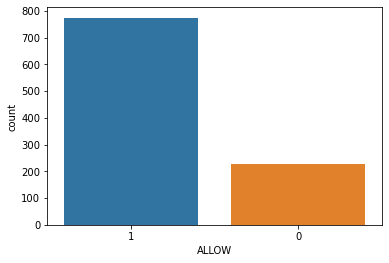

In [92]:
risk_plot = sns.countplot(data=ANSWER, x='ALLOW', order=ANSWER['ALLOW'].value_counts().index)
plt.show()